#### Importing Neccessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import os
#os.urandom(24)

In [3]:
!pip install flask-ngrok

from flask_ngrok import run_with_ngrok
from flask import Flask

app = Flask(__name__)
run_with_ngrok(app)
@app.route("/")
def home():
    return "<h1>Running Flask on Google Colab!</h1>"
  
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://986070628fbd.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [26/Jul/2020 22:58:25] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Jul/2020 22:58:26] "GET /favicon.ico HTTP/1.1" 404 -


In [4]:
import re    # for regular expressions 
import nltk  # for text manipulation  
import string #for string manipulations
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

#### Let’s read train and test datasets.

In [ ]:
pwd

'/kaggle/working'

In [6]:
data=pd.read_csv('/sentiment.csv')

In [7]:
train=data[:80394]

In [8]:
test=data[80394:]

In [9]:
test.drop('sentiment',1,inplace=True)

Dividing it into 2 parts:
#### 1.Data Inspection
#### 2.Data Cleaning

#### Data Inspection
Let’s check out a few non racist/sexist tweets.



In [10]:
train.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,sentiment
0,2/1/20,MaziIbe_,NaN,22,409,1307,If coronavirus don reach Lagos Na to break my piggyvest and live life to the fullest because life’s really Gbemi.,NaN,NaN,NaN,1.220000e+18,https://twitter.com/MaziIbe_/status/1223757186339348481,1
1,2/1/20,TeddyVallee,NaN,6,18,129,Seems US equity mkts still not appreciating significance of the Corona virus &amp; it's happening at a pretty bad time given the lack of a material pick up in growth in 1H20 based on our leads. Th...,NaN,NaN,NaN,1.220000e+18,https://twitter.com/TeddyVallee/status/1223756985457434624,-1
2,2/1/20,editorbrian,NaN,51,119,660,"Stop with the ""flu is deadlier than the coronavirus"" takes. The coronavirus mortality rate, so far, is around 2.2 percent. The flu mortality rate is around 0.13 percent. We are dealing with a high...",NaN,NaN,#coronovirusoutbreak,1.220000e+18,https://twitter.com/editorbrian/status/1223756338590818305,1
3,2/1/20,TalbertSwan,NaN,18,27,88,"Lord have mercy, a case of coronavirus was confirmed in Massachusetts. #coronavirus",NaN,NaN,#coronavirus,1.220000e+18,https://twitter.com/TalbertSwan/status/1223755818362904577,1
4,2/1/20,DEADLINE,NaN,6,24,65,Fans Claim The Simpsons Predicted Coronavirus Outbreak In 1993 Episode http://dlvr.it/RPCP1F,NaN,NaN,NaN,1.220000e+18,https://twitter.com/DEADLINE/status/1223755678184947712,0


In [11]:
train[train['sentiment']==0].head(10)

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,sentiment
4,2/1/20,DEADLINE,NaN,6,24,65,Fans Claim The Simpsons Predicted Coronavirus Outbreak In 1993 Episode http://dlvr.it/RPCP1F,NaN,NaN,NaN,1.220000e+18,https://twitter.com/DEADLINE/status/1223755678184947712,0
5,2/1/20,KKeneally,NaN,26,57,180,"Bushfire crisis Sports Rorts Now the Coronavirus This do-nothing Government has no plan for our country. Australians are scared and worried, but Scott Morrison and the Liberals are refusing to sho...",NaN,NaN,NaN,1.220000e+18,https://twitter.com/KKeneally/status/1223755537793212417,0
7,2/1/20,souperfan2012,NaN,7,41,135,"With Corona virus slated to grow more rapidly from the southern border area, Democrats will have to run 2020 campaigns with the knowledge President Trumps Wall was prophetic. #DrainTheSwamp",NaN,NaN,#DrainTheSwamp,1.220000e+18,https://twitter.com/souperfan2012/status/1223755250496045061,0
10,2/1/20,Mikeggibbs,NaN,31,103,598,"If you're a ""teacher"" and work at a private school and refuse to go to work because your student population includes Asian children, I severely question whether you have education certification. A...",NaN,NaN,#coronavirus #onpoli,1.220000e+18,https://twitter.com/Mikeggibbs/status/1223754424969060352,0
12,2/1/20,AndrewHolnessJM,NaN,19,54,138,"The Ministry of Health and Wellness is reporting that the patient who presented at the Annotto Bay Hospital with complaints of a headache, anorexia, chills, dryness to the throat and generalised w...",NaN,NaN,NaN,1.220000e+18,https://twitter.com/AndrewHolnessJM/status/1223754043937390593,0
17,2/1/20,MaggieJordanACN,realDonaldTrump,6,63,142,Please remind trump he has a personal responsibility to visit and embrace all people in the US who contract the coronavirus.,NaN,NaN,NaN,1.220000e+18,https://twitter.com/MaggieJordanACN/status/1223752945570807808,0
19,2/1/20,jeremyfaust,NaN,16,110,448,"U.S. deaths from coronavirus: 0 Panic level: U.S. deaths from guns DAILY: Panic level: 0 Carry on, ‘murica...carry on.",NaN,NaN,NaN,1.220000e+18,https://twitter.com/jeremyfaust/status/1223752726481379334,0
21,2/1/20,thehill,NaN,8,55,63,Massachusetts confirms eighth case of coronavirus in US http://hill.cm/RZLcxt3,NaN,NaN,NaN,1.220000e+18,https://twitter.com/thehill/status/1223752154344718342,0
26,2/1/20,WSJ,NaN,10,59,78,The coronavirus in two months has sickened thousands in China and reached more than a dozen countries. Here's a look at how it spread.,NaN,NaN,NaN,1.220000e+18,https://twitter.com/WSJ/status/1223750413704482816,0
27,2/1/20,AbkaFitzHenley,NaN,7,46,46,Health Ministry says patient admitted to Annotto Bay Hospital in St. Mary does not meet Corona virus case definition (not a suspected case). Also 19 Chinese tourists quarantined on Friday and retu...,NaN,NaN,NaN,1.220000e+18,https://twitter.com/AbkaFitzHenley/status/1223750259626729473,0


In [12]:
train[train['sentiment']==1].head(10)

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,sentiment
0,2/1/20,MaziIbe_,NaN,22,409,1307,If coronavirus don reach Lagos Na to break my piggyvest and live life to the fullest because life’s really Gbemi.,NaN,NaN,NaN,1.220000e+18,https://twitter.com/MaziIbe_/status/1223757186339348481,1
2,2/1/20,editorbrian,NaN,51,119,660,"Stop with the ""flu is deadlier than the coronavirus"" takes. The coronavirus mortality rate, so far, is around 2.2 percent. The flu mortality rate is around 0.13 percent. We are dealing with a high...",NaN,NaN,#coronovirusoutbreak,1.220000e+18,https://twitter.com/editorbrian/status/1223756338590818305,1
3,2/1/20,TalbertSwan,NaN,18,27,88,"Lord have mercy, a case of coronavirus was confirmed in Massachusetts. #coronavirus",NaN,NaN,#coronavirus,1.220000e+18,https://twitter.com/TalbertSwan/status/1223755818362904577,1
8,2/1/20,CBCAlerts,NaN,138,100,235,Racism 'still very much alive' in Canada as stereotypes around coronavirus spread.,NaN,NaN,NaN,1.220000e+18,https://twitter.com/CBCAlerts/status/1223754726837231616,1
9,2/1/20,Holly_WV,NaN,9,123,84,Voices from Wuhan Stop and imagine if it were your friends &amp; family No Choices No Medical Treatment No diagnosis “Can only sit and wait to die” ‘We are helpless” “We too want to live” The hor...,NaN,NaN,#coronavirus #PrayForChina,1.220000e+18,https://twitter.com/Holly_WV/status/1223754718016671744,1
11,2/1/20,FinnaganMarina,NaN,17,82,94,Lysol was ready for the Coronavirus But China wasn’t?,NaN,NaN,NaN,1.220000e+18,https://twitter.com/FinnaganMarina/status/1223754333218648064,1
13,2/1/20,NYCMayorsOffice,NaN,49,180,175,HAPPENING NOW: @NYCMayor holds a press conference on the first suspected case of Coronavirus in New York City.,NaN,@NYCMayor,NaN,1.220000e+18,https://twitter.com/NYCMayorsOffice/status/1223753962135769089,1
16,2/1/20,WilliamYang120,NaN,5,50,174,"And in Peru and Angola, both countries have confirmed that the suspected cases are all not caused by the #coronavirus.",NaN,NaN,#coronavirus,1.220000e+18,https://twitter.com/WilliamYang120/status/1223753471209271296,1
18,2/1/20,CGTNOfficial,NaN,23,125,169,"1,921 new confirmed #coronavirus cases and 45 more deaths reported Saturday in C. China's #Hubei Province, the epicenter of the outbreak: (Pics from the Central Hospital of Wuhan) The total number...",NaN,NaN,#coronavirus #Hubei,1.220000e+18,https://twitter.com/CGTNOfficial/status/1223752938645934080,1
22,2/1/20,LJWorld,NaN,1,35,201,"A Lawrence patient has tested negative for coronavirus, health officials confirmed today: https://ljw.bz/2S8VDnw",NaN,NaN,NaN,1.220000e+18,https://twitter.com/LJWorld/status/1223751368726454273,1


#### There are quite a many words and characters which are not really required. So, we will try to keep only those words which are important and add value.

In [13]:
train.shape,test.shape

((80394, 13), (29000, 12))

In [14]:
train['sentiment'].value_counts()

 1    34616
 0    26219
-1    19559
Name: sentiment, dtype: int64

#### In the train dataset, we have 2,242 (7%) tweets labeled as racist or sexist, and 29,720 (93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge.

#### Now we will check the distribution of length of the tweets, in terms of words, in both train and test data.

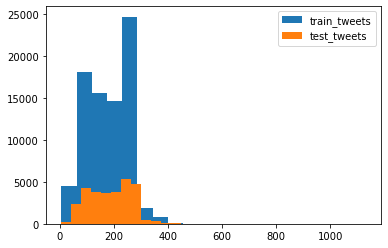

In [ ]:
train_length = train['text'].str.len()
test_length = test['text'].str.len()
plt.hist(train_length,bins=20,label="train_tweets")
plt.hist(test_length,bins=20,label="test_tweets")
plt.legend()
plt.show()

In [ ]:
#??plt.hist

In any natural language processing task, cleaning raw text data is an important step. It helps in getting rid of the unwanted words and characters which helps in obtaining better features. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data. The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

Before we begin cleaning, let’s first combine train and test datasets. Combining the datasets will make it convenient for us to preprocess the data. Later we will split it back into train and test data.

#### Given below is a user-defined function to remove unwanted text patterns from the tweets.

In [ ]:
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt    

In [ ]:
#?np.vectorize

We will remove the twitter handles as they are already masked as @user due to privacy concerns. 
We will also get rid of the punctuations, numbers and even special characters 

#### 1. Removing Twitter Handles (@user)
Let’s create a new column tidy_tweet, it will contain the cleaned and processed tweets. Note that we have passed “@[]*” as the pattern to the remove_pattern function. It is actually a regular expression which will pick any word starting with ‘@’.

In [ ]:
combi=train.append(test)

In [ ]:
#removing twitter handles @user
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['text'], "@[\w]*") 
combi.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,sentiment,tidy_tweet
0,2/1/20,MaziIbe_,NaN,22,409,1307,If coronavirus don reach Lagos Na to break my piggyvest and live life to the fullest because life’s really Gbemi.,NaN,NaN,NaN,1.220000e+18,https://twitter.com/MaziIbe_/status/1223757186339348481,1.0,If coronavirus don reach Lagos Na to break my piggyvest and live life to the fullest because life’s really Gbemi.
1,2/1/20,TeddyVallee,NaN,6,18,129,Seems US equity mkts still not appreciating significance of the Corona virus &amp; it's happening at a pretty bad time given the lack of a material pick up in growth in 1H20 based on our leads. Th...,NaN,NaN,NaN,1.220000e+18,https://twitter.com/TeddyVallee/status/1223756985457434624,-1.0,Seems US equity mkts still not appreciating significance of the Corona virus &amp; it's happening at a pretty bad time given the lack of a material pick up in growth in 1H20 based on our leads. Th...
2,2/1/20,editorbrian,NaN,51,119,660,"Stop with the ""flu is deadlier than the coronavirus"" takes. The coronavirus mortality rate, so far, is around 2.2 percent. The flu mortality rate is around 0.13 percent. We are dealing with a high...",NaN,NaN,#coronovirusoutbreak,1.220000e+18,https://twitter.com/editorbrian/status/1223756338590818305,1.0,"Stop with the ""flu is deadlier than the coronavirus"" takes. The coronavirus mortality rate, so far, is around 2.2 percent. The flu mortality rate is around 0.13 percent. We are dealing with a high..."
3,2/1/20,TalbertSwan,NaN,18,27,88,"Lord have mercy, a case of coronavirus was confirmed in Massachusetts. #coronavirus",NaN,NaN,#coronavirus,1.220000e+18,https://twitter.com/TalbertSwan/status/1223755818362904577,1.0,"Lord have mercy, a case of coronavirus was confirmed in Massachusetts. #coronavirus"
4,2/1/20,DEADLINE,NaN,6,24,65,Fans Claim The Simpsons Predicted Coronavirus Outbreak In 1993 Episode http://dlvr.it/RPCP1F,NaN,NaN,NaN,1.220000e+18,https://twitter.com/DEADLINE/status/1223755678184947712,0.0,Fans Claim The Simpsons Predicted Coronavirus Outbreak In 1993 Episode http://dlvr.it/RPCP1F


#### 2. Removing Punctuations, Numbers, and Special Characters

Here we will replace everything except characters and hashtags with spaces. The regular expression “[^a-zA-Z#]” means anything except alphabets and ‘#’.

In [ ]:
#removing punctuations , numbers and spl charecters
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combi.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,sentiment,tidy_tweet
0,2/1/20,MaziIbe_,NaN,22,409,1307,If coronavirus don reach Lagos Na to break my piggyvest and live life to the fullest because life’s really Gbemi.,NaN,NaN,NaN,1.220000e+18,https://twitter.com/MaziIbe_/status/1223757186339348481,1.0,If coronavirus don reach Lagos Na to break my piggyvest and live life to the fullest because life s really Gbemi
1,2/1/20,TeddyVallee,NaN,6,18,129,Seems US equity mkts still not appreciating significance of the Corona virus &amp; it's happening at a pretty bad time given the lack of a material pick up in growth in 1H20 based on our leads. Th...,NaN,NaN,NaN,1.220000e+18,https://twitter.com/TeddyVallee/status/1223756985457434624,-1.0,Seems US equity mkts still not appreciating significance of the Corona virus amp it s happening at a pretty bad time given the lack of a material pick up in growth in H based on our leads Th...
2,2/1/20,editorbrian,NaN,51,119,660,"Stop with the ""flu is deadlier than the coronavirus"" takes. The coronavirus mortality rate, so far, is around 2.2 percent. The flu mortality rate is around 0.13 percent. We are dealing with a high...",NaN,NaN,#coronovirusoutbreak,1.220000e+18,https://twitter.com/editorbrian/status/1223756338590818305,1.0,Stop with the flu is deadlier than the coronavirus takes The coronavirus mortality rate so far is around percent The flu mortality rate is around percent We are dealing with a high...
3,2/1/20,TalbertSwan,NaN,18,27,88,"Lord have mercy, a case of coronavirus was confirmed in Massachusetts. #coronavirus",NaN,NaN,#coronavirus,1.220000e+18,https://twitter.com/TalbertSwan/status/1223755818362904577,1.0,Lord have mercy a case of coronavirus was confirmed in Massachusetts #coronavirus
4,2/1/20,DEADLINE,NaN,6,24,65,Fans Claim The Simpsons Predicted Coronavirus Outbreak In 1993 Episode http://dlvr.it/RPCP1F,NaN,NaN,NaN,1.220000e+18,https://twitter.com/DEADLINE/status/1223755678184947712,0.0,Fans Claim The Simpsons Predicted Coronavirus Outbreak In Episode http dlvr it RPCP F


#### 3. Removing Short Words

We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [ ]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split()  if len(w)>3]))
combi.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,sentiment,tidy_tweet
0,2/1/20,MaziIbe_,NaN,22,409,1307,If coronavirus don reach Lagos Na to break my piggyvest and live life to the fullest because life’s really Gbemi.,NaN,NaN,NaN,1.220000e+18,https://twitter.com/MaziIbe_/status/1223757186339348481,1.0,coronavirus reach Lagos break piggyvest live life fullest because life really Gbemi
1,2/1/20,TeddyVallee,NaN,6,18,129,Seems US equity mkts still not appreciating significance of the Corona virus &amp; it's happening at a pretty bad time given the lack of a material pick up in growth in 1H20 based on our leads. Th...,NaN,NaN,NaN,1.220000e+18,https://twitter.com/TeddyVallee/status/1223756985457434624,-1.0,Seems equity mkts still appreciating significance Corona virus happening pretty time given lack material pick growth based leads These types shocks turn into triggers That said this could being very
2,2/1/20,editorbrian,NaN,51,119,660,"Stop with the ""flu is deadlier than the coronavirus"" takes. The coronavirus mortality rate, so far, is around 2.2 percent. The flu mortality rate is around 0.13 percent. We are dealing with a high...",NaN,NaN,#coronovirusoutbreak,1.220000e+18,https://twitter.com/editorbrian/status/1223756338590818305,1.0,Stop with deadlier than coronavirus takes coronavirus mortality rate around percent mortality rate around percent dealing with highly contagious disease with known cure That reality #coronovirusou...
3,2/1/20,TalbertSwan,NaN,18,27,88,"Lord have mercy, a case of coronavirus was confirmed in Massachusetts. #coronavirus",NaN,NaN,#coronavirus,1.220000e+18,https://twitter.com/TalbertSwan/status/1223755818362904577,1.0,Lord have mercy case coronavirus confirmed Massachusetts #coronavirus
4,2/1/20,DEADLINE,NaN,6,24,65,Fans Claim The Simpsons Predicted Coronavirus Outbreak In 1993 Episode http://dlvr.it/RPCP1F,NaN,NaN,NaN,1.220000e+18,https://twitter.com/DEADLINE/status/1223755678184947712,0.0,Fans Claim Simpsons Predicted Coronavirus Outbreak Episode http dlvr RPCP


#### 4. Text Normalization

Here we will use nltk’s PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [ ]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                                                                                           [coronavirus, reach, Lagos, break, piggyvest, live, life, fullest, because, life, really, Gbemi]
1    [Seems, equity, mkts, still, appreciating, significance, Corona, virus, happening, pretty, time, given, lack, material, pick, growth, based, leads, These, types, shocks, turn, into, triggers, That...
2    [Stop, with, deadlier, than, coronavirus, takes, coronavirus, mortality, rate, around, percent, mortality, rate, around, percent, dealing, with, highly, contagious, disease, with, known, cure, Tha...
3                                                                                                                             [Lord, have, mercy, case, coronavirus, confirmed, Massachusetts, #coronavirus]
4                                                                                                                       [Fans, Claim, Simpsons, Predicted, Coronavirus, Outbreak, Ep

In [ ]:
combi.drop(['tidy_tweet'],axis=1,inplace=True)
combi.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,sentiment
0,2/1/20,MaziIbe_,NaN,22,409,1307,If coronavirus don reach Lagos Na to break my piggyvest and live life to the fullest because life’s really Gbemi.,NaN,NaN,NaN,1.220000e+18,https://twitter.com/MaziIbe_/status/1223757186339348481,1.0
1,2/1/20,TeddyVallee,NaN,6,18,129,Seems US equity mkts still not appreciating significance of the Corona virus &amp; it's happening at a pretty bad time given the lack of a material pick up in growth in 1H20 based on our leads. Th...,NaN,NaN,NaN,1.220000e+18,https://twitter.com/TeddyVallee/status/1223756985457434624,-1.0
2,2/1/20,editorbrian,NaN,51,119,660,"Stop with the ""flu is deadlier than the coronavirus"" takes. The coronavirus mortality rate, so far, is around 2.2 percent. The flu mortality rate is around 0.13 percent. We are dealing with a high...",NaN,NaN,#coronovirusoutbreak,1.220000e+18,https://twitter.com/editorbrian/status/1223756338590818305,1.0
3,2/1/20,TalbertSwan,NaN,18,27,88,"Lord have mercy, a case of coronavirus was confirmed in Massachusetts. #coronavirus",NaN,NaN,#coronavirus,1.220000e+18,https://twitter.com/TalbertSwan/status/1223755818362904577,1.0
4,2/1/20,DEADLINE,NaN,6,24,65,Fans Claim The Simpsons Predicted Coronavirus Outbreak In 1993 Episode http://dlvr.it/RPCP1F,NaN,NaN,NaN,1.220000e+18,https://twitter.com/DEADLINE/status/1223755678184947712,0.0


In [ ]:
# combi = train.append(test,ignore_index=True,sort=False)
# combi.shape

Now we can normalize the tokenized tweets.

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
#stemming
tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

#Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet    

In [ ]:
!pip install wordcloud

### Story Generation and Visualization from Tweets


A few probable questions are as follows:

    What are the most common words in the entire dataset?
    What are the most common words in the dataset for negative and positive tweets, respectively?
    How many hashtags are there in a tweet?
    Which trends are associated with my dataset?
    Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

##### A) Understanding the common words used in the tweets: WordCloud

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

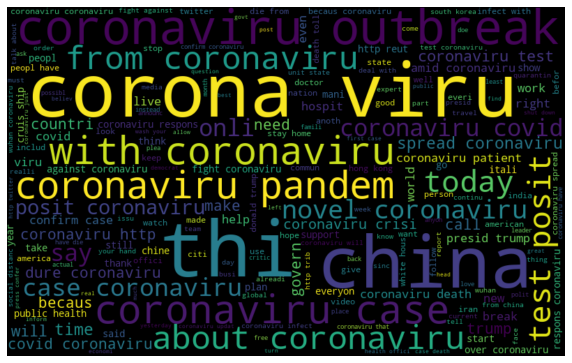

In [ ]:
all_words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. Words like love, great, friend, life are the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes (racist/sexist or not) in our train data.

### B) Words in non racist/sexist tweets


Most of the frequent words are compatible with the sentiment, i.e, non-racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

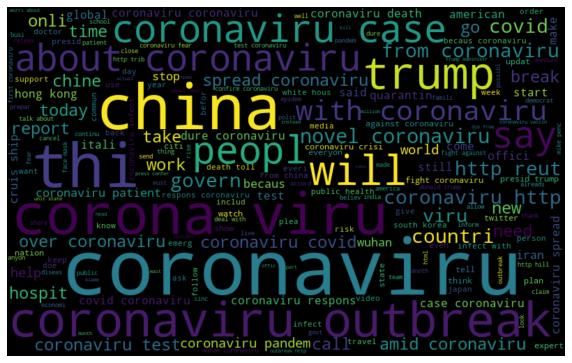

In [ ]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

### C) Racist/Sexist Tweets

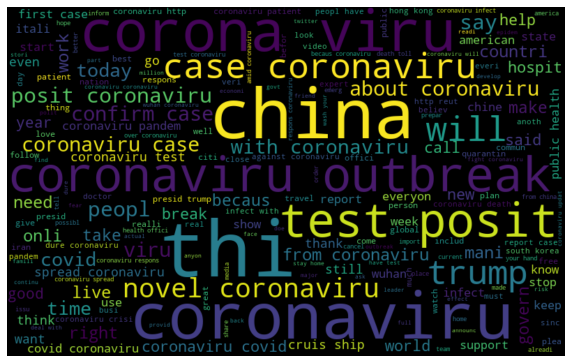

In [ ]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['sentiment'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.

### D) Understanding the impact of Hashtags on tweets sentiment

Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

For instance, given below is a tweet from our dataset:
![image.png](attachment:image.png)

The tweet seems sexist in nature and the hashtags in the tweet convey the same feeling.

We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

In [ ]:
# function to collect hashtags
def hashtag_extract(x):    
    hashtags = []  
    # Loop over the words in the tweet  
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)     
    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 0]) 
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['sentiment'] == 1]) 
# unnesting list 
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top ‘n’ hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

#### Non-Racist/Sexist Tweets

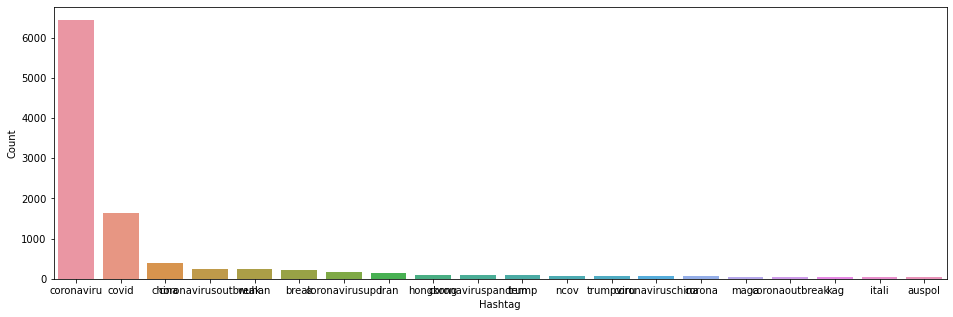

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags  
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
plt.show()

#### Racist/Sexist Tweets

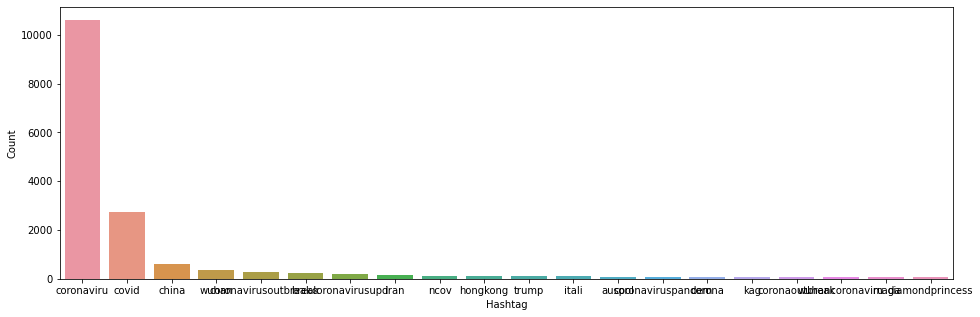

In [ ]:
b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

In [ ]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


### Bag-of-Words Features

To analyse a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag of Words, TF-IDF, and Word Embeddings. Read on to understand these techniques in detail.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

Let’s start with the Bag-of-Words Features.

Consider a Corpus C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a dictionary and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

Let us understand this using a simple example.

D1: He is a lazy boy. She is also lazy.

D2: Smith is a lazy person.

The dictionary created would be a list of unique tokens in the corpus =[‘He’,’She’,’lazy’,’boy’,’Smith’,’person’]

Here, D=2, N=6

The matrix M of size 2 X 6 will be represented as –
![image.png](attachment:image.png)

Now the columns in the above matrix can be used as features to build a classification model.

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(109394, 1000)

### TF-IDF Features
This is another method which is based on the frequency method but it is different to the bag-of-words approach in the sense that it takes into account not just the occurrence of a word in a single document (or tweet) but in the entire corpus.

TF-IDF works by penalising the common words by assigning them lower weights while giving importance to words which are rare in the entire corpus but appear in good numbers in few documents.

Let’s have a look at the important terms related to TF-IDF:

    TF = (Number of times term t appears in a document)/(Number of terms in the document)

    IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

    TF-IDF = TF*IDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(109394, 1000)

### Word2Vec Features

Word embeddings are the modern way of representing words as vectors. The objective of word embeddings is to redefine the high dimensional word features into low dimensional feature vectors by preserving the contextual similarity in the corpus. They are able to achieve tasks like King -man +woman = Queen, which is mind-blowing.

Drawing

The advantages of using word embeddings over BOW or TF-IDF are:

    Dimensionality reduction - significant reduction in the no. of features required to build a model.

    It capture meanings of the words, semantic relationships and the different types of contexts they are used in.


1. Word2Vec Embeddings

Word2Vec is not a single algorithm but a combination of two techniques – CBOW (Continuous bag of words) and Skip-gram model. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). Both of these techniques learn weights which act as word vector representations.

CBOW tends to predict the probability of a word given a context. A context may be a single adjacent word or a group of surrounding words. The Skip-gram model works in the reverse manner, it tries to predict the context for a given word.

Below is a diagrammatic representation of a 1-word context window Word2Vec model.
![image.png](attachment:image.png)


There are three laters: - an input layer, - a hidden layer, and - an output layer.

The input layer and the output, both are one- hot encoded of size [1 X V], where V is the size of the vocabulary (no. of unique words in the corpus). The output layer is a softmax layer which is used to sum the probabilities obtained in the output layer to 1. The weights learned by the model are then used as the word-vectors.

We will go ahead with the Skip-gram model as it has the following advantages:

    It can capture two semantics for a single word. i.e it will have two vector representations of ‘apple’. One for the company Apple and the other for the fruit.

    Skip-gram with negative sub-sampling outperforms CBOW generally.

We will train a Word2Vec model on our data to obtain vector representations for all the unique words present in our corpus. There is one more option of using pre-trained word vectors instead of training our own model. Some of the freely available pre-trained vectors are:

    Google News Word Vectors

    Freebase names

    DBPedia vectors (wiki2vec)

Let’s train a Word2Vec model on our corpus.

In [ ]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
# tokenizing
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)


(34242260, 39364460)

Let’s play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus.

In [ ]:
model_w2v.wv.most_similar(positive="dinner")

[('errand', 0.5075165629386902),
 ('forster', 0.43766093254089355),
 ('hotpot', 0.4350367784500122),
 ('leftov', 0.43407541513442993),
 ('largo', 0.43188801407814026),
 ('lohei', 0.43024706840515137),
 ('doze', 0.422294557094574),
 ('delici', 0.4140705168247223),
 ('nestor', 0.41084858775138855),
 ('karaok', 0.41081589460372925)]

From the above two examples, we can see that our word2vec model does a good job of finding the most similar words for a given word. But how is it able to do so? That’s because it has learned vectors for every unique word in our data and it uses cosine similarity to find out the most similar vectors (words).

Let’s check the vector representation of any word from our corpus.

In [ ]:
model_w2v.wv.most_similar(positive="threat")

[('pose', 0.5605553984642029),
 ('risk', 0.5017228126525879),
 ('gravest', 0.5012670755386353),
 ('danger', 0.49323245882987976),
 ('devastatingli', 0.4860888123512268),
 ('graver', 0.4795340299606323),
 ('oncom', 0.47385817766189575),
 ('unwis', 0.46499648690223694),
 ('hurd', 0.4596298336982727),
 ('blindspot', 0.4523669481277466)]

In [ ]:
model_w2v.wv.most_similar(positive='china')

[('chines', 0.6314211487770081),
 ('#china', 0.6212746500968933),
 ('bbzjaac', 0.5490798950195312),
 ('wuhan', 0.5335702896118164),
 ('#dead', 0.5143622159957886),
 ('beij', 0.5067785382270813),
 ('#airforc', 0.5044252872467041),
 ('#usmca', 0.5026992559432983),
 ('wenzhou', 0.4996799826622009),
 ('shellshock', 0.4966706931591034)]

In [ ]:
model_w2v['virus']

array([-1.0713019e-01,  2.8013867e-01,  3.5226071e-01,  2.3159405e-02,
       -5.2329272e-01, -2.5410134e-02, -4.5725074e-01, -2.8372645e-01,
        6.0747139e-02,  6.9587201e-02, -3.3395854e-01,  3.1494915e-01,
       -2.9221701e-02,  4.7164284e-02, -1.9628242e-01, -8.2630223e-01,
        2.4592699e-01, -1.7933701e-01,  7.9980083e-02, -4.4801807e-01,
       -1.3435219e-01,  1.8709837e-01, -4.9918240e-01, -3.9960921e-01,
       -3.3210874e-01, -1.2024542e-02, -2.7914670e-01,  7.7815133e-01,
        4.7101095e-01,  3.6756170e-01, -2.3901571e-01, -3.1222054e-03,
        1.2406931e-01,  2.5309014e-01,  6.9544089e-01,  5.5180138e-01,
        6.5958440e-01, -4.8857263e-01,  1.6578231e-02, -2.3917964e-01,
        2.3597309e-01, -2.4171287e-01, -2.5187668e-01,  3.5400847e-01,
        7.1136653e-02, -7.4559265e-01,  5.4019725e-01,  1.0043166e-01,
       -1.4326331e-01, -2.1289481e-01, -4.3346664e-01,  1.3622308e-01,
        2.9816219e-01, -5.3801831e-02, -5.1094377e-01,  3.1439644e-01,
      

In [ ]:
len(model_w2v['virus'])

200

#### Preparing Vectors for Tweets

Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [ ]:
def word_vector(tokens,size):
    vec = np.zeros(size).reshape((1,size))
    count = 0
    for word in tokens:
        try:
            vec+=model_w2v[word].reshape((1,size))
            count+=1.
        except KeyError:
            #handling the case where the token is not in vocabulary
            continue
    if count!=0:
        vec/=count
        return vec

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape   

(109394, 200)

In [ ]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


#### 2. Doc2Vec Embedding

Doc2Vec model is an unsupervised algorithm to generate vectors for sentence/paragraphs/documents. This approach is an extension of the word2vec. The major difference between the two is that doc2vec provides an additional context which is unique for every document in the corpus. This additional context is nothing but another feature vector for the whole document. This document vector is trained along with the word vectors.

![image.png](attachment:image.png)

Let’s load the required libraries.

In [ ]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet) # label all the tweets

In [ ]:
labeled_tweets[:6]

[LabeledSentence(words=['coronaviru', 'reach', 'lago', 'break', 'piggyvest', 'live', 'life', 'fullest', 'becaus', 'life', 'realli', 'gbemi'], tags=['tweet_0']),
 LabeledSentence(words=['seem', 'equiti', 'mkt', 'still', 'appreci', 'signific', 'corona', 'viru', 'happen', 'pretti', 'time', 'given', 'lack', 'materi', 'pick', 'growth', 'base', 'lead', 'these', 'type', 'shock', 'turn', 'into', 'trigger', 'that', 'said', 'thi', 'could', 'be', 'veri'], tags=['tweet_1']),
 LabeledSentence(words=['stop', 'with', 'deadlier', 'than', 'coronaviru', 'take', 'coronaviru', 'mortal', 'rate', 'around', 'percent', 'mortal', 'rate', 'around', 'percent', 'deal', 'with', 'highli', 'contagi', 'diseas', 'with', 'known', 'cure', 'that', 'realiti', '#coronovirusoutbreak'], tags=['tweet_2']),
 LabeledSentence(words=['lord', 'have', 'merci', 'case', 'coronaviru', 'confirm', 'massachusett', '#coronaviru'], tags=['tweet_3']),
 LabeledSentence(words=['fan', 'claim', 'simpson', 'predict', 'coronaviru', 'outbreak', 'e

In [ ]:
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model                                   
                                  dm_mean=1, # dm = 1 for using mean of the context word vectors                                  
                                  size=200, # no. of desired features                                  
window=5, # width of the context window                                  
negative=7, # if > 0 then negative sampling will be used                                
                                  min_count=5, # Ignores all words with total frequency lower than 2.                                  
workers=3, # no. of cores                                  
alpha=0.1, # learning rate                                  
seed = 23)
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

100%|██████████| 109394/109394 [00:00<00:00, 1209562.19it/s]


In [ ]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(109394, 200)

### Modeling


We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

    Logistic Regression
    Support Vector Machine
    RandomForest
    XGBoost

Evaluation Metric

F1 score is being used as the evaluation metric. It is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is suitable for uneven class distribution problems.

The important components of F1 score are:

    True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.
    True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.
    False Positives (FP) – When actual class is no and predicted class is yes.
    False Negatives (FN) – When actual class is yes but predicted class in no.

Precision = TP/TP+FP

Recall = TP/TP+FN

F1 Score = 2(Recall Precision) / (Recall + Precision)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
# Extracting train and test BoW features
train_bow = bow[:80394,:] 
test_bow = bow[80394:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['sentiment'], random_state=42, test_size=0.3)

lreg = LogisticRegression() 
# # training the model
lreg.fit(xtrain_bow, ytrain) 
# prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
# prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
# prediction_int = prediction_int.astype(np.int) 
# f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

LogisticRegression()

In [ ]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [ ]:
train_tfidf = tfidf[:80394,:] 
test_tfidf = tfidf[80394:,:] 
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int,average='macro') # calculating f1 score for the validation set

0.11060731595069868

In [ ]:
train_w2v = wordvec_df.iloc[:80394,:] 
test_w2v = wordvec_df.iloc[80394:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
# lreg.fit(xtrain_w2v, ytrain) 
# prediction = lreg.predict_proba(xvalid_w2v)
# prediction_int = prediction[:,1] >= 0.3
# prediction_int = prediction_int.astype(np.int) 
# f1_score(yvalid, prediction_int)

In [ ]:
#!pip install xgboost

### XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 
f1_score(yvalid, prediction,average='macro')

0.7182327813288488

In [ ]:
test_pred = xgb_model.predict(test_bow) 
test['sentiment'] = test_pred 
submission = test[['id','sentiment']] 
submission.to_csv('sub_xgb_bow.csv', index=False)

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf) 
f1_score(yvalid, prediction,average='macro')

0.7170108612109697

In [ ]:
# xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
# prediction = xgb.predict(xvalid_w2v)
# f1_score(yvalid, prediction,average='macro')   --> 0.637

### FineTuning XGBoost + Word2Vec

XGBoost with Word2Vec model has given us the best performance so far. Let’s try to tune it further to extract as much from it as we can. XGBoost has quite a many tuning parameters and sometimes it becomes tricky to properly tune them. This is what we are going to do in the following steps. You can refer this guide to learn more about parameter tuning in XGBoost.

In [ ]:
import xgboost as xgb
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain) 
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid) 
dtest = xgb.DMatrix(test_w2v)
# Parameters that we are going to tune 
params = {
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

In [ ]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds,average='macro'))]

General Approach for Parameter Tuning

We will follow the steps below to tune the parameters.

    Choose a relatively high learning rate. Usually a learning rate of 0.3 is used at this stage.

    Tune tree-specific parameters such as max_depth, min_child_weight, subsample, colsample_bytree keeping the learning rate fixed.

    Tune the learning rate.

    Finally tune gamma to avoid overfitting.

Tuning max_depth and min_child_weight

In [ ]:
# gridsearch_params = [
#     (max_depth, min_child_weight)
#     for max_depth in range(6,10)
#      for min_child_weight in range(5,8)
#  ]

# max_f1 = 0. # initializing with 0 
# best_params = None 
# for max_depth, min_child_weight in gridsearch_params:
#     print("CV with max_depth={}, min_child_weight={}".format(
#                              max_depth,
#                              min_child_weight))
#      # Update our parameters
#     params['max_depth'] = max_depth
#     params['min_child_weight'] = min_child_weight

#      # Cross-validation
#     cv_results = xgb.cv(        params,
#         dtrain,        feval= custom_eval,
#         num_boost_round=200,
#         maximize=True,
#         seed=16,
#         nfold=5,
#         early_stopping_rounds=10
#     )     
# # Finding best F1 Score
    
# mean_f1 = cv_results['test-f1_score-mean'].max()
    
# boost_rounds = cv_results['test-f1_score-mean'].argmax()    
# print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))    
# if mean_f1 > max_f1:
#         max_f1 = mean_f1
#         best_params = (max_depth,min_child_weight) 

# print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))


In [ ]:
# #Updating max_depth and min_child_weight parameters.
# params['max_depth'] = 9 
# params['min_child_weight'] = 7

##### Tuning subsample and colsample

In [ ]:
# gridsearch_params = [
#     (subsample, colsample)
#     for subsample in [i/10. for i in range(5,10)]
#     for colsample in [i/10. for i in range(5,10)] ]

# max_f1 = 0. 
# best_params = None 
# for subsample, colsample in gridsearch_params:
#     print("CV with subsample={}, colsample={}".format(
#                              subsample,
#                              colsample))
#      # Update our parameters
#     params['colsample'] = colsample
#     params['subsample'] = subsample
#     cv_results = xgb.cv(
#         params,
#         dtrain,
#         feval= custom_eval,
#         num_boost_round=200,
#         maximize=True,
#         seed=16,
#         nfold=5,
#         early_stopping_rounds=10
#     )
#      # Finding best F1 Score
#     mean_f1 = cv_results['test-f1_score-mean'].max()
#     boost_rounds = cv_results['test-f1_score-mean'].idxmax()
#     print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
#     if mean_f1 > max_f1:
#         max_f1 = mean_f1
#         best_params = (subsample, colsample) 

# print("Best params: {}, {}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))

##### Updating subsample and colsample_bytree

In [ ]:
# params['subsample'] = .9 
# params['colsample_bytree'] = .5

##### Now let’s tune the learning rate.

In [ ]:
# max_f1 = 0. 
# best_params = None 
# for eta in [.3, .2, .1, .05, .01, .005]:
#     print("CV with eta={}".format(eta))
#      # Update ETA
#     params['eta'] = eta

#      # Run CV
#     cv_results = xgb.cv(
#         params,
#         dtrain,
#         feval= custom_eval,
#         num_boost_round=1000,
#         maximize=True,
#         seed=16,
#         nfold=5,
#         early_stopping_rounds=20
#     )

#      # Finding best F1 Score
#     mean_f1 = cv_results['test-f1_score-mean'].max()
#     boost_rounds = cv_results['test-f1_score-mean'].argmax()
#     print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
#     if mean_f1 > max_f1:
#         max_f1 = mean_f1
#         best_params = eta 
# print("Best params: {}, F1 Score: {}".format(best_params, max_f1))

In [ ]:
#Updating the learning rate
#'objective': 'binary:logistic',
params['eta'] = .2
params
{'colsample': 0.9,
 'colsample_bytree': 0.5, 'eta': 0.1,
 'max_depth': 8, 'min_child_weight': 6,
 'subsample': 0.9}

{'colsample': 0.9,
 'colsample_bytree': 0.5,
 'eta': 0.1,
 'max_depth': 8,
 'min_child_weight': 6,
 'subsample': 0.9}

Finally we can now use these tuned parameters in our xgboost model. We have used early stopping of 10 which means if the model’s performance doesn’t improve under 10 rounds, then the model training will be stopped.

In [ ]:
xgb_model = xgb.train(
    params,
    dtrain,
    feval= custom_eval,
    num_boost_round= 1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
 )

[0]	Validation-rmse:0.83354	Validation-f1_score:0.20317
Multiple eval metrics have been passed: 'Validation-f1_score' will be used for early stopping.

Will train until Validation-f1_score hasn't improved in 10 rounds.
[1]	Validation-rmse:0.81403	Validation-f1_score:0.24861
[2]	Validation-rmse:0.79997	Validation-f1_score:0.31445
[3]	Validation-rmse:0.78998	Validation-f1_score:0.33652
[4]	Validation-rmse:0.78229	Validation-f1_score:0.33943
[5]	Validation-rmse:0.77697	Validation-f1_score:0.33783
[6]	Validation-rmse:0.77260	Validation-f1_score:0.33798
[7]	Validation-rmse:0.76890	Validation-f1_score:0.33668
[8]	Validation-rmse:0.76588	Validation-f1_score:0.33514
[9]	Validation-rmse:0.76332	Validation-f1_score:0.33551
[10]	Validation-rmse:0.76089	Validation-f1_score:0.33658
[11]	Validation-rmse:0.75901	Validation-f1_score:0.33771
[12]	Validation-rmse:0.75728	Validation-f1_score:0.33896
[13]	Validation-rmse:0.75602	Validation-f1_score:0.33934
[14]	Validation-rmse:0.75428	Validation-f1_score:

In [ ]:
test_pred = xgb_model.predict(dtest)
test['sentiment'] = (test_pred >= 0.3).astype(np.int)
#submission = test[['id','sentiment']] 
#submission.to_csv('sub_xgb_w2v_finetuned.csv', index=False)

In [ ]:
import pickle

In [ ]:
with open('xgb.pkl','wb') as model_pkl:
    pickle.dump(xgb_model, model_pkl)

In [ ]:
pwd

'/kaggle/working'

In [ ]:
ls

__notebook_source__.ipynb  sub_lreg_bow.csv  sub_xgb_bow.csv  xgb.pkl


In [ ]:
cp xgb.pkl ../input/covid-sentiment

cp: cannot create regular file '../input/covid-sentiment': Read-only file system
